<a href="https://colab.research.google.com/github/cantaruttim/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError

In [2]:
dataset = pd.read_csv('diabetes.rwrite1.csv', encoding= "utf_8", delimiter=" ")
dataset

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220


In [3]:
X = dataset.iloc[:, 0:10].values
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [30]:
y = dataset.iloc[:, 10].values
y

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144,  97, 168,  68,  49,  68, 245, 184, 202,
       137,  85, 131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,
        90, 100,  55,  61,  92, 259,  53, 190, 142,  75, 142, 155, 225,
        59, 104, 182, 128,  52,  37, 170, 170,  61, 144,  52, 128,  71,
       163, 150,  97, 160, 178,  48, 270, 202, 111,  85,  42, 170, 200,
       252, 113, 143,  51,  52, 210,  65, 141,  55, 134,  42, 111,  98,
       164,  48,  96,  90, 162, 150, 279,  92,  83, 128, 102, 302, 198,
        95,  53, 134, 144, 232,  81, 104,  59, 246, 297, 258, 229, 275,
       281, 179, 200, 200, 173, 180,  84, 121, 161,  99, 109, 115, 268,
       274, 158, 107,  83, 103, 272,  85, 280, 336, 281, 118, 317, 235,
        60, 174, 259, 178, 128,  96, 126, 288,  88, 292,  71, 197, 186,
        25,  84,  96, 195,  53, 217, 172, 131, 214,  59,  70, 220, 268,
       152,  47,  74, 295, 101, 151, 127, 237, 225,  81, 151, 10

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression(n_jobs = 30).fit(X_train, y_train)
reg

LinearRegression(n_jobs=30)

In [ ]:
previsoes = reg.predict(X_test)
previsoes

In [8]:
reg.score(X_test, y_test) # , reg.coef_, reg.intercept_

0.45260660216173787

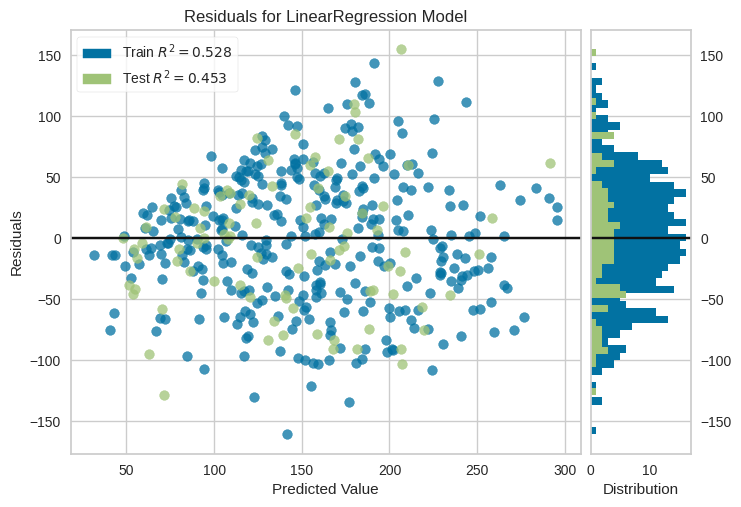

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot


"""
O gráfico de resíduos mostra a diferença entre os resíduos no 
eixo vertical e a variável dependente no eixo horizontal, 
permitindo detectar regiões dentro do alvo que podem ser 
susceptíveis a mais ou menos erros

Objetivo: 

  -  analisar a variância do erro do regressor.

"""

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

In [29]:
previsoes = model.predict(X_test)
previsoes

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

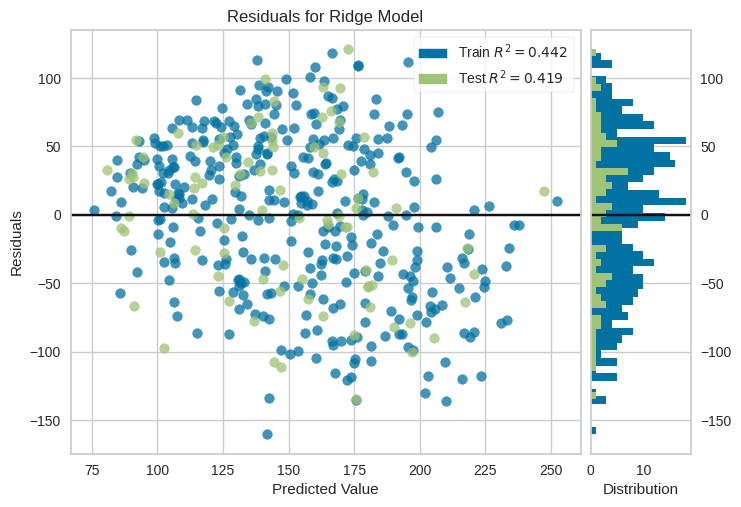

In [32]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();   

In [33]:
previsoes_Ridge = model.predict(X_test)
previsoes_Ridge

array([157.28552724, 163.00881063, 155.1808409 , 247.34572515,
       143.86539626, 126.29597049, 218.14744355, 190.20793835,
       113.85148733, 134.55894262, 117.02128379, 144.48525984,
        87.28861607, 197.14084556, 125.51000069, 138.51573422,
       205.36031869, 220.7380849 , 169.06119149, 196.32673285,
       175.59380829, 114.95364873, 101.19472233, 180.24036634,
       146.93490606, 162.96904085, 174.96220933, 169.48155706,
        80.9993115 , 138.96451765, 170.06612054, 113.58185921,
       143.88961607, 176.39214929, 171.50678172, 180.29782974,
       141.03735278, 143.6071404 , 165.05395559,  90.61240049,
       108.11630033, 129.7377614 , 153.90107041, 164.58713704,
       166.08911167,  94.58796931, 102.54433262, 114.4536641 ,
        89.45732402, 147.17764005, 139.75865177,  91.12486234,
       135.90128573, 123.02786429, 175.74503462, 144.21775963,
       121.37659507, 181.99630492, 123.14703371,  90.51979689,
       178.64887636, 172.75021382, 140.23918465, 131.67

In [37]:
"""
O histograma pode ser substituído por um gráfico Q-Q, 
que é uma maneira comum de verificar se os resíduos são normalmente distribuídos. 
Se os resíduos são normalmente distribuídos, então seus quantis quando plotados
contra quantis de distribuição normal devem formar uma linha reta

"""

'\nO histograma pode ser substituído por um gráfico Q-Q, \nque é uma maneira comum de verificar se os resíduos são normalmente distribuídos. \nSe os resíduos são normalmente distribuídos, então seus quantis quando plotados\ncontra quantis de distribuição normal devem formar uma linha reta\n\n'

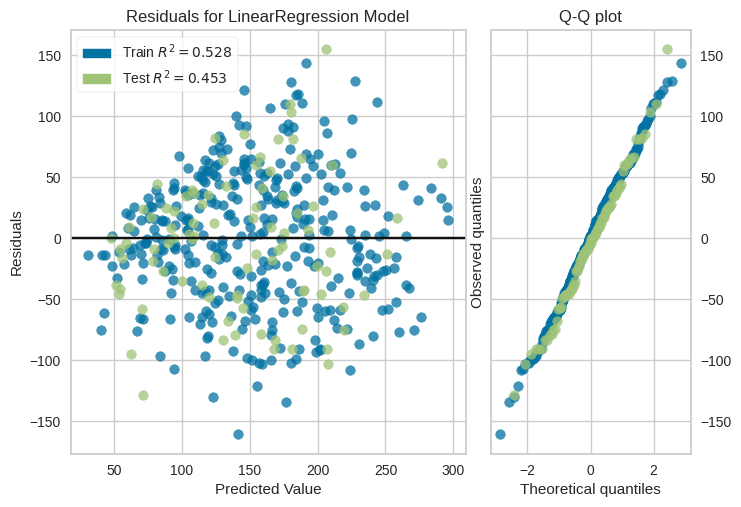

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
visualizer = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

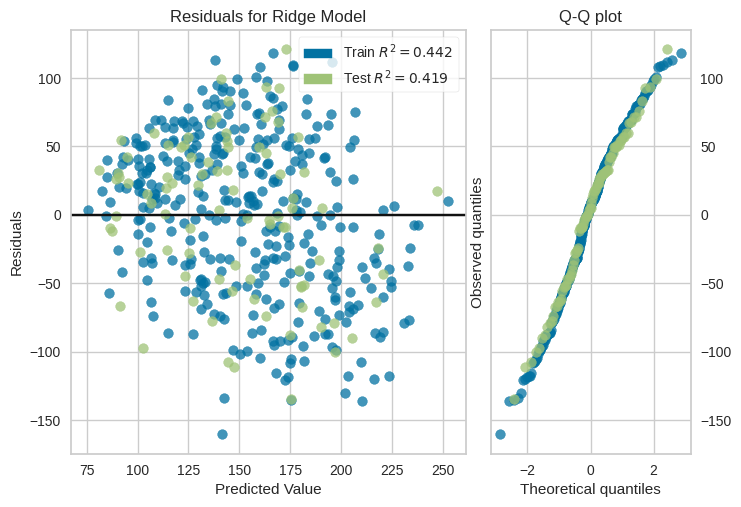

In [39]:
visualizer = ResidualsPlot(Ridge(), hist=False,  qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

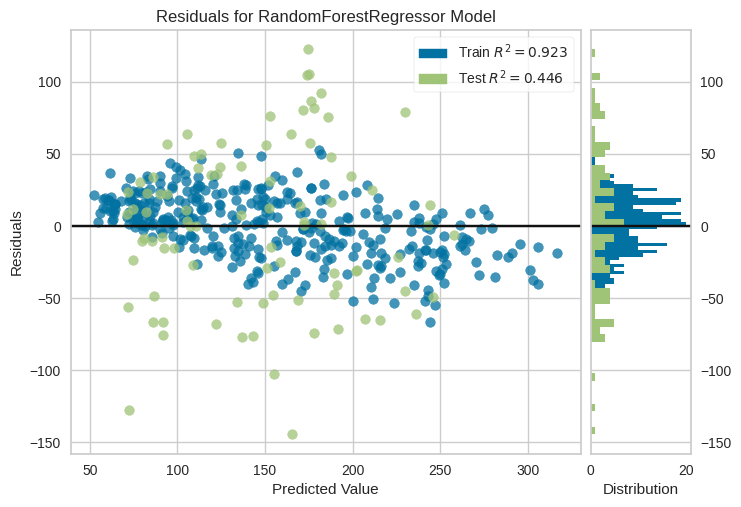

In [40]:
## Vamos testar utilizando um Ensemble Method

from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(RandomForestRegressor(n_estimators=200), X_train, y_train, X_test, y_test)

In [42]:
model = RandomForestRegressor(n_estimators=600)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.43874102370005663

In [44]:
previsoes_RandomForest = model.predict(X_test)
previsoes_RandomForest

array([143.3       , 182.65833333, 151.85      , 250.88833333,
       112.87166667, 120.74333333, 251.81      , 209.56666667,
       139.77833333, 176.915     , 100.755     , 174.305     ,
        89.02166667, 247.71666667,  88.85      , 129.38666667,
       244.44833333, 268.49833333, 181.26166667, 231.24      ,
       159.57      , 115.63333333,  69.38833333, 191.335     ,
       140.62333333, 177.27333333, 195.33666667, 151.655     ,
        70.34      , 106.32      , 176.83666667, 105.25333333,
       180.515     , 205.42666667, 155.49833333, 206.22      ,
       110.58666667, 118.735     , 178.535     ,  75.70666667,
        76.63666667,  87.74166667, 171.37      , 161.57      ,
       173.31333333,  85.00666667,  68.32      , 118.115     ,
        79.635     , 157.335     , 107.08333333,  84.63166667,
       170.93333333, 108.59166667, 186.07833333, 137.09      ,
        98.48666667, 232.775     ,  89.42666667,  82.43833333,
       155.29166667, 169.6       , 134.98      , 101.32

### Erros

In [18]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(y_test, previsoes, squared=False)
# mean_squared_error(y_test, previsoes, squared=True)

2973.6352266541826

In [47]:
mean_squared_error(y_test, previsoes_Ridge, squared=False)
# mean_squared_error(y_test, previsoes_Ridge, squared=True)

3077.4142782200897

In [48]:
mean_squared_error(y_test, previsoes_RandomForest, squared=False)
# mean_squared_error(y_test, previsoes_RandomForest, squared=True)

2973.6352266541826